In [2]:
import re
import os
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, linewidth=100000)
plt.rcParams.update({'font.size': 20})

In [44]:
def re_int(string_sub, string_search):
    return int(re.sub(string_sub, '', re.search(r'%s\d+' % (string_sub), string_search).group()))

def re_float(string_sub, string_search):
    return float(re.sub(string_sub, '', re.search(r'%s[-]?\d+[.]\d+' % (string_sub), string_search).group()))

def print_hamiltonian(path_hamiltonian):
    N  = re_int('N',  path_hamiltonian)
    Ne = re_int('Ne', path_hamiltonian)
    U  = re_float('U', path_hamiltonian)
    
    hamiltonian = np.zeros((N, N), dtype='complex')
    for data in np.genfromtxt(path_hamiltonian):
        hamiltonian[int(data[0]), int(data[1])] = data[2] + 1j * data[3]
    print(hamiltonian.real)
    
def show_E_U(dir_output, method=['soft', 'qsoft']):
    system, params = dir_output.split('/')[::2]
    marker = ['none', 'o']
    linestyle=['-', 'none']
    
    data = [[] for _ in range(len(method))]
    for i, m in enumerate(method):
        for fn in [fn for fn in os.listdir(dir_output)]:
            if re.match(f'{m}_hamiltonian', fn):
                data[i].append([re_float('_U', fn), re_float('_e', fn)])
        data[i] = np.sort(data[i], axis=0)
    data = np.array(data)

    fig, ax = plt.subplots(constrained_layout=True)
    for d, m, mk, ls in zip(data, method, marker, linestyle):
        ax.plot(d[:, 0], d[:, 1], marker=mk, linestyle=ls, label=f'{m.upper()}')
    ax.set_xlabel(r'$U/t$')
    ax.set_ylabel(r'$E/t$')
    ax.set_title(re.sub('_', ' ', f'{system} {params}'), fontsize='medium')
    ax.legend(fontsize='x-small')
    ax.grid(True)
    plt.show()

# hub1d

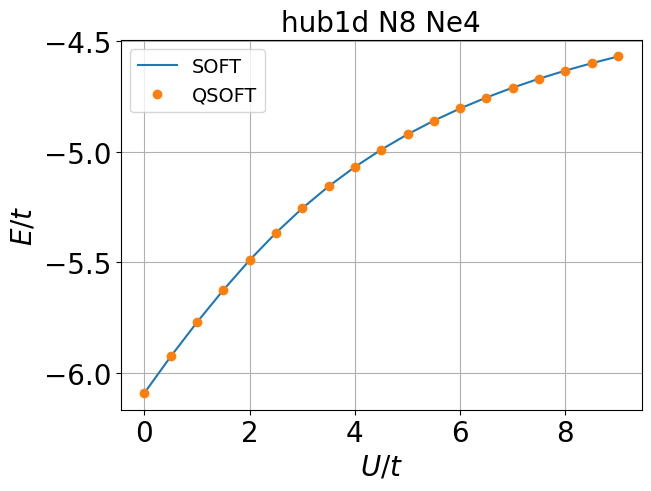

In [45]:
show_E_U('hub1d/output/N8_Ne4', method=['soft', 'qsoft'])

# hchain

In [46]:
#show_E_U('h8chain/output/N8_Ne4', method=['soft'])